In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix


In [2]:
csv_file_path = "Resources/card_transdata.csv"
df = pd.read_csv(csv_file_path)

In [3]:

df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [5]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [7]:
fraud_cases=len(df[df['fraud']==1])
print(' Number of Fraud Cases:',fraud_cases)

 Number of Fraud Cases: 87403


In [8]:
non_fraud_cases=len(df[df['fraud']==0])
print('Number of Non Fraud Cases:',non_fraud_cases)

Number of Non Fraud Cases: 912597


In [9]:
fraud=df[df['fraud']==1]
Nonfraud=df[df['fraud']==0]

<AxesSubplot:xlabel='fraud', ylabel='count'>

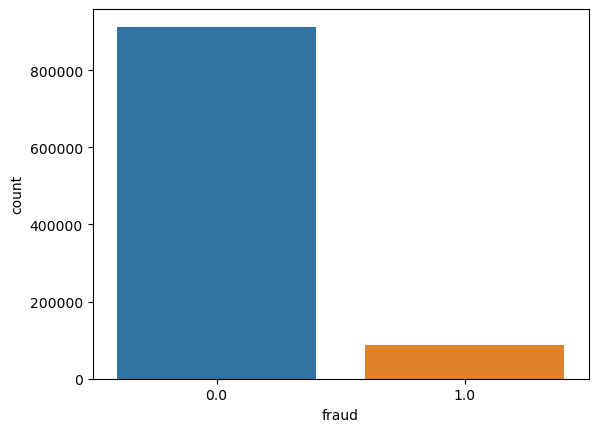

In [10]:
#Unbalanced Data
sns.countplot(x='fraud',data=df)

In [11]:
# Using SMOTE to address the issue of imbalance
sm = SMOTE(sampling_strategy='minority', random_state=7)
resampled_X, resampled_Y = sm.fit_resample(df.drop('fraud', axis=1), df['fraud'])
oversampled_df = pd.concat([pd.DataFrame(resampled_X), pd.DataFrame(resampled_Y)], axis=1)
oversampled_df.columns = df.columns
oversampled_df['fraud'].value_counts()


fraud
0.0    912597
1.0    912597
Name: count, dtype: int64

In [12]:
df['fraud'].value_counts()

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

<AxesSubplot:xlabel='fraud', ylabel='count'>

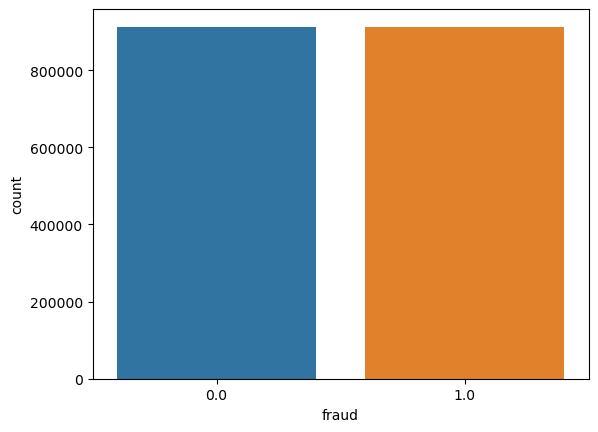

In [13]:
# Balanced Data
sns.countplot(x='fraud', data=oversampled_df)

In [14]:
oversampled_df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.000000,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.000000,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.000000,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.000000,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.000000,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
1825189,339.323378,61.110720,1.412187,1.000000,0.0,0.0,1.0,1.0
1825190,6.585948,0.109166,4.392025,1.000000,0.0,0.0,1.0,1.0
1825191,20.150916,0.503998,6.648288,1.000000,0.0,0.0,1.0,1.0
1825192,1.015895,0.775900,7.614940,0.000000,0.0,0.0,0.0,1.0


In [15]:
# Logistic Regression Model

from sklearn.linear_model import LogisticRegression
x = oversampled_df.drop(['fraud'],axis=1)
y = oversampled_df['fraud']

# Split the data using train_test_split
# Instantiate the Logistic Regression Model
# Assign a random_state parameter of  to the model
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
logistic = LogisticRegression(max_iter=1000)


# Fit the model using training data
model = logistic.fit(x_train, y_train)



# Predict and Print the accuracy score of the model

prediction = model.predict(x_test)

accuracy_score(y_test,prediction)


0.9416413360537718

In [16]:
print("Accuracy - " + str(accuracy_score(y_test,prediction)))
print("Recall - " + str(recall_score(y_test,prediction)))
print("precision - " + str(precision_score(y_test,prediction)))


Accuracy - 0.9416413360537718
Recall - 0.9498059519742087
precision - 0.9346134781577983


In [17]:
# Generate a confusion matrix for the model
generat_confusion_matrix = confusion_matrix(y_test,prediction)
print('Confusion Matrix is : ')
print(generat_confusion_matrix)



Confusion Matrix is : 
[[212835  15170]
 [ 11459 216835]]


In [18]:
# Random Classifier Model

x1 = oversampled_df.drop(['fraud'],axis=1)
y1 = oversampled_df['fraud']

In [19]:
# Split the data using train_test_split
# Instantiate the Random Classfier Model
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, random_state=42)
randomforest = RandomForestClassifier()


In [20]:
# Fit the model using training data

model1 = randomforest.fit(x1_train,y1_train)

In [21]:
#Predict and print accuracy score

prediction1 = model1.predict(x1_test)
accuracy_score(y1_test,prediction1)

print("Accuracy - " + str(accuracy_score(y1_test,prediction1)))
print("Recall - " + str(recall_score(y1_test,prediction1)))
print("precision - " + str(precision_score(y1_test,prediction1)))

Accuracy - 0.9999934253636322
Recall - 0.9999868590501721
precision - 1.0


In [22]:
# Generate a confusion matrix for the model

generat_confusion_matrix = confusion_matrix(y1_test,prediction)
print('Confusion Matrix is : ')
print(generat_confusion_matrix)

Confusion Matrix is : 
[[212835  15170]
 [ 11459 216835]]


In [23]:
# Decisison Tree

x2 = oversampled_df.drop(['fraud'],axis=1)
y2 = oversampled_df['fraud']

dt = DecisionTreeRegressor()

In [24]:
# Training and fitting the models
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.3,random_state=123)

model2 = dt.fit(x2_train,y2_train)

In [25]:
#Predict and print accuracy score

prediction2 = model2.predict(x2_test)

accuracy_score(y2_test,prediction2)

print("Accuracy - " + str(accuracy_score(y2_test,prediction2)))
print("Recall - " + str(recall_score(y2_test,prediction2)))
print("precision - " + str(precision_score(y2_test,prediction2)))

Accuracy - 0.9999744319790196
Recall - 0.9999744273554232
precision - 0.9999744273554232


In [26]:
!pip install gradio

In [27]:
# The following method accepts inputs from the gradio interface and provides prediction output 
import gradio as gr
def credit_card_features(distance_from_home,	distance_from_last_transaction,	ratio_to_median_purchase_price,	repeat_retailer,	used_chip,	used_pin_number,	online_order):
#turning the arguments into a numpy array
  x = np.array([distance_from_home,	distance_from_last_transaction,	ratio_to_median_purchase_price,	repeat_retailer,	used_chip,	used_pin_number,	online_order])
  prediction = model2.predict(x.reshape(1, -1))
  return prediction


# The models predicted output for above feature input is output to a text box on the gradio interface
outputs = gr.outputs.Textbox()

app = gr.Interface(fn=credit_card_features, inputs=['number','number','number','number','number','number','number'], outputs=outputs,description="This is a Credit Card  model")

C:\Users\anith\AppData\Local\Temp\ipykernel_23380\2504468172.py:11: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  outputs = gr.outputs.Textbox()


In [28]:
app.launch(share=True,debug=True)

Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://60e1b648a93e89f10b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7861 <> https://60e1b648a93e89f10b.gradio.live
